Build decision tree model on titanic dataset to predict survival based on certain parameters

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [54]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [55]:
inputs = df.drop('Survived', axis='columns')
target = df['Survived']

In [56]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [57]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [58]:
inputs.Sex = inputs.Sex.map({'male':1, 'female':2})
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


# Looking for nulls/cleaning

<AxesSubplot:>

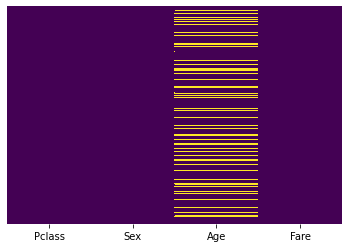

In [50]:
import seaborn as sns
sns.heatmap(inputs.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [68]:
#just to make sure
inputs.isna().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [69]:
inputs.Age.fillna(inputs.Age.mean(), inplace=True)

In [71]:
#verifying again
inputs.isna().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [72]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [74]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [75]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
model.score(X_test, y_test)

0.7262569832402235

In [79]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_predicted)
confusion_matrix

array([[82, 24],
       [25, 48]], dtype=int64)

Text(69.0, 0.5, 'Truth')

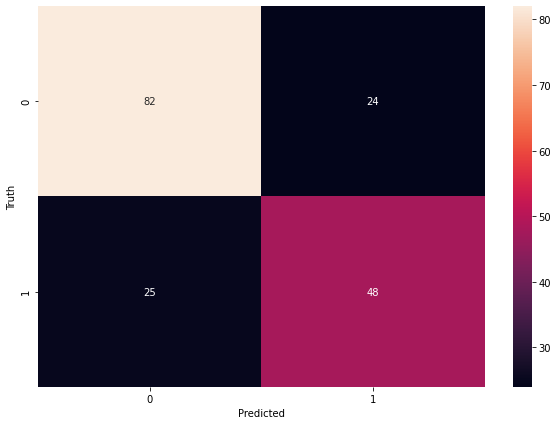

In [80]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')